# Figure S3 - H2E confusion

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import h5py

import EIANN.utils as ut
import EIANN.plot as pt
from EIANN.generate_figures import *

pt.update_plot_defaults()

%load_ext autoreload
%autoreload 2

In [ ]:
figure_name = "FigS3_confusion_plots"
model_list = ["vanBP", "bpDale_learned", "HebbWN_topsup", "bpLike_WT_hebbdend"]
model_dict_all = load_model_dict()

generate_hdf5_all_seeds(model_list, model_dict_all, variables_to_save=["average_pop_activity_dict"], recompute=None)

Generating plots for Backprop (ANN)
Generating plots for Backprop (EIANN)
Generating plots for Hebb (EIANN)
Generating plots for Dend. Target Prop.


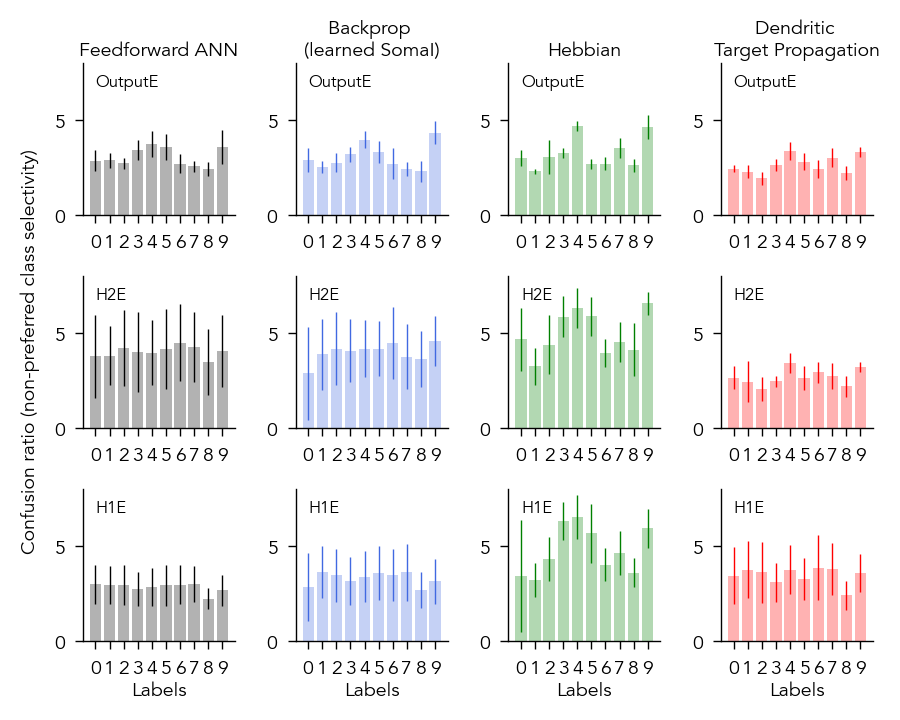

In [ ]:
fig = plt.figure(figsize=(6.5, 3.4))
axes = gs.GridSpec(nrows=3, ncols=6, figure=fig,            
                            left=0.045,right=0.98,
                            top=0.95, bottom=0.1,
                            wspace=0.4, hspace=0.4)

root_dir = ut.get_project_root()

for col, model_key in enumerate(model_list):
    model_dict = model_dict_all[model_key]
    network_name = model_dict['config'].split('.')[0]
    hdf5_path = root_dir + f"/EIANN/data/model_hdf5_plot_data/plot_data_{network_name}.h5"
    with h5py.File(hdf5_path, 'r') as f:
        data_dict = f[network_name]
        print(f"Generating plots for {model_dict['label']}")
        population = 'H2DendI'
        example_seed = model_dict['seeds'][0] # example seed to plot

        for row, pop in enumerate(['OutputE', 'H2E', 'H1E']):
            ax = fig.add_subplot(axes[row, col])
            plot_confusion_all_seeds(data_dict, model_dict, ax=ax, population=pop)
            ax.set_ylabel('')
            ax.set_xlabel('')
            ax.text(0, 7, pop, fontsize=6, ha='left', va='center')            
            if row==0:
                ax.set_title(model_dict['display_name'], pad=3, fontsize=7)
            if row==1 and col==0:
                ax.set_title("Confusion ratio (non-preferred class selectivity)", rotation=90, x=-0.35, y=0.4, va='center', fontsize=7)
            if row==2:
                ax.set_xlabel('Labels', labelpad=1)

fig.savefig(f"{root_dir}/EIANN/figures/{figure_name}.svg", dpi=300)
fig.savefig(f"{root_dir}/EIANN/figures/{figure_name}.png", dpi=300)